
image 1/1 /home/angelo/Documentos/Integrador/IA-Materiais/Integrador/networks/img_000017.jpg: 352x608 1 plate, 1 vehicle, 285.2ms
Speed: 3.5ms preprocess, 285.2ms inference, 3.9ms postprocess per image at shape (1, 3, 352, 608)


[W926 17:28:09.322704529 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W926 17:28:09.325634866 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W926 17:28:09.330155531 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W926 17:28:09.331965829 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


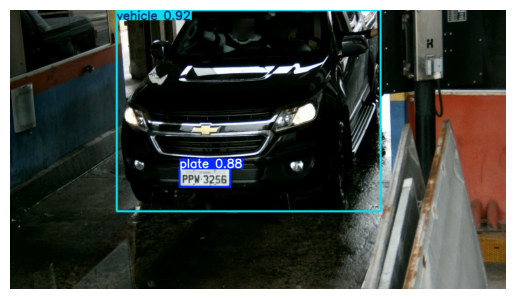

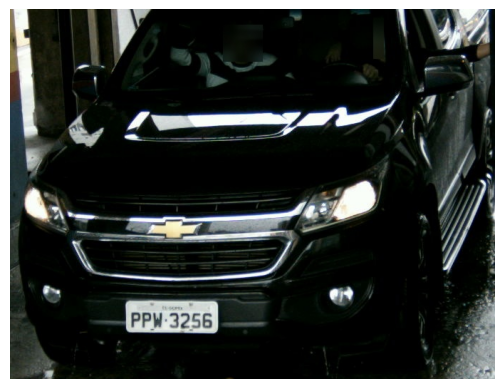

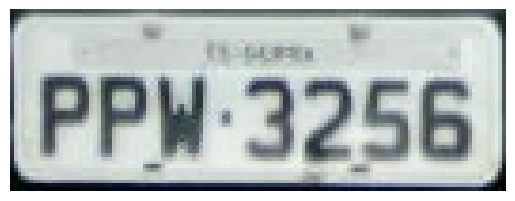

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
# Carrega o modelo treinado
model = YOLO('v8n_augmentado_plate_vehicle.pt')

# Faz a predição
results = model.predict(
    source='img_000017.jpg',
    imgsz=608,  # múltiplo de 32
    conf=0.25
)

# Exibe no notebook
for r in results:
    img = r.plot()              # adiciona caixas e labels
    plt.imshow(img[..., ::-1])  # converte BGR → RGB
    plt.axis('off')
    plt.show()
    

    # Imagem original
    orig = r.orig_img

    # Loop sobre todas as detecções
    for box in r.boxes.xyxy:  # formato [xmin, ymin, xmax, ymax]
        xmin, ymin, xmax, ymax = map(int, box)
        plate_crop = orig[ymin:ymax, xmin:xmax]  # recorta

        # Mostra o recorte
        plt.imshow(plate_crop[..., ::-1])  # converte BGR → RGB
        plt.axis('off')
        plt.show()


In [8]:
# !pip install fast_plate_ocr
import re
from fast_plate_ocr import LicensePlateRecognizer
m = LicensePlateRecognizer('cct-xs-v1-global-model')
plate = m.run(plate_crop)[0]
def get_plate(ocr_result: str) -> str | None:
    text = ocr_result.strip().upper()
    # Regex para padrão antigo (AAA-1234) e Mercosul (AAA1A23)
    pattern = r"[A-Z]{3}[- ]?\d{4}|[A-Z]{3}\d[A-Z]\d{2}"
    match = re.search(pattern, text)
    if match:
        return match.group(0).replace(" ", "").replace("-", "")
    return None
print(get_plate(plate))

PPW3256


In [4]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless -y
!pip install opencv-python --force-reinstall

Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
     

In [ ]:
# !pip install opencv-contrib-python --force-reinstall

from ultralytics import YOLO
import cv2

# Carrega o modelo (troque pelo seu .pt se quiser)
model = YOLO("yolo11n.pt")

# Abre a webcam (0 = webcam padrão)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Faz inferência
    results = model(frame, conf=0.4, verbose=False)

    # Mostra resultado com bounding boxes
    annotated = results[0].plot()
    cv2.imshow("YOLO Webcam", annotated)

    # Aperte 'q' para sair
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


[W1003 23:19:08.409923078 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.413976037 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.417117891 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.420015010 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.528312072 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.531377049 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.533996836 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.537104123 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.874441112 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W1003 23:19:08.885399563 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
